<a href="https://colab.research.google.com/github/yaobviously/PyMC3threes/blob/main/threes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import pymc3 as pm
import arviz as az
import theano as tt
import pandas as pd
import numpy as np
threes_data_url = r'https://github.com/yaobviously/PyMC3threes/raw/main/threesmodel_small.csv'

     |████████████████████████████████| 1.4MB 5.2MB/s 
     |████████████████████████████████| 4.7MB 18.8MB/s 
     |████████████████████████████████| 317kB 35.6MB/s 
     |████████████████████████████████| 911kB 4.5MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 5.2MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp37-none-any.whl size=2667178 sha256=01b6f9f50b1c5bd30b9c66694ffb941be55688fcdcfa6cdf3a25dc656a94ad70
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [6]:
threes_data = pd.read_csv(threes_data_url)
threes_data['GMMlabel'] = threes_data['GMMlabel'].astype('category')
players = threes_data['Player']
gmm_cat = threes_data['GMMlabel']         
threes_att = np.array(threes_data['3PA_x']).T
threes_made = np.array(threes_data['3P_x']).T

sample_size = len(threes_att)

In [7]:
sample_size

30

In [8]:
# Specifying the model

with pm.Model() as threes_model:

# This line specifies a uniform distribution over the prior probability of the
# sample's mean three point percentage

  phi = pm.Uniform('phi', lower = 0.0, upper = 1.0)
 
# These lines specify an exponential prior over kappa that is transformed
# into kappa.

  kappa_log = pm.Exponential("kappa_log", lam = 1.5)
  kappa = pm.Deterministic("kappa", np.exp(kappa_log))

# Each player gets their own 'theta', or estimated three point percentage. It is drawn
# from a combination specified by phi and kappa.

  thetas = pm.Beta("thetas", alpha = phi * kappa, beta = (1 - phi) * kappa, shape = sample_size)

# This specifies the proximate process generating the observations: the total number 
# of threes made. n = attempts, p = probability of a make.

  y = pm.Binomial("y", n = threes_att, p = thetas, observed = threes_made)


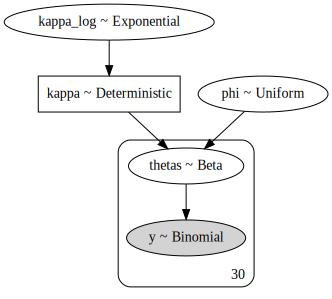

In [ ]:
# This line expresses the above model in plate notation, which allows us to examine
# the structure of the model.

pm.model_to_graphviz(threes_model)

In [10]:
# Sampling the posterior given our data. It's in a separate cell in case we want
# to revise our model after examining it in plate notation.

with threes_model:
    trace = pm.sample(25000, tune=5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [thetas, kappa_log, phi]
Sampling chain 1, 16 divergences: 100%|██████████| 30000/30000 [01:21<00:00, 367.36it/s]
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [11]:
df = az.summary(trace)

In [13]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
phi,0.392,0.006,0.379,0.404,0.000,0.000,22502.0,22502.0,22219.0,29557.0,1.0
kappa_log,6.365,0.753,5.050,7.862,0.015,0.011,2572.0,2280.0,3196.0,1867.0,1.0
kappa,811.576,904.234,93.185,2169.967,25.586,20.938,1249.0,933.0,3196.0,1867.0,1.0
thetas[0],0.384,0.015,0.354,0.413,0.000,0.000,39440.0,39440.0,39386.0,31157.0,1.0
thetas[1],0.388,0.016,0.358,0.417,0.000,0.000,48829.0,48829.0,47957.0,33209.0,1.0
thetas[2],0.399,0.016,0.369,0.430,0.000,0.000,38985.0,38235.0,39167.0,29603.0,1.0
thetas[3],0.392,0.016,0.361,0.424,0.000,0.000,54496.0,54240.0,53857.0,32191.0,1.0
thetas[4],0.376,0.017,0.343,0.407,0.000,0.000,21191.0,21191.0,21618.0,30878.0,1.0
thetas[5],0.391,0.017,0.359,0.422,0.000,0.000,57757.0,57757.0,56714.0,33786.0,1.0
thetas[6],0.386,0.017,0.352,0.416,0.000,0.000,43078.0,43078.0,42763.0,33713.0,1.0


/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31b68c8f10>,
      dtype=object)

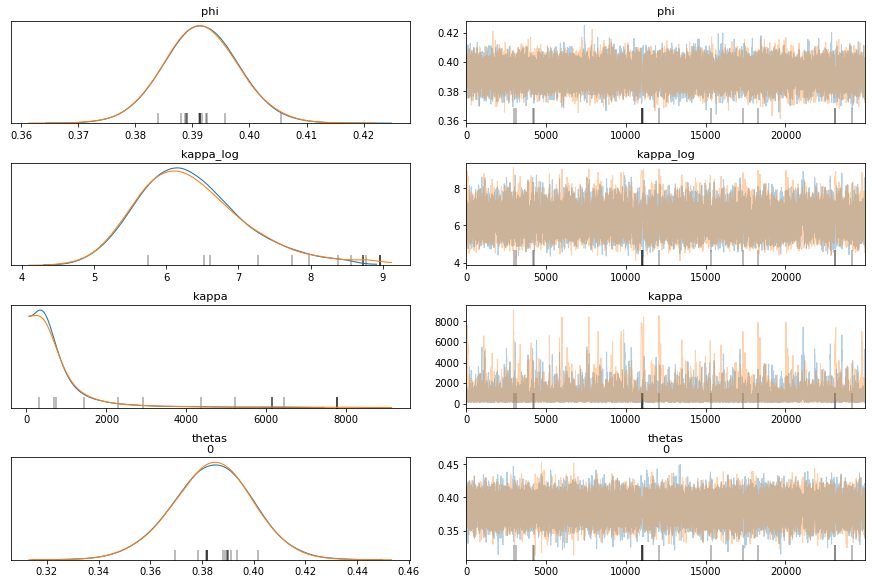

In [14]:
az.plot_trace(trace)

In [15]:
df2 = pd.DataFrame(trace.thetas)
df2.columns = players


In [17]:
df2.mean()

Player
Damian Lillard      0.015471
Buddy Hield         0.015513
Stephen Curry       0.015995
Duncan Robinson     0.016357
Jordan Clarkson     0.017288
Donovan Mitchell    0.016554
Fred VanVleet       0.016704
Zach LaVine         0.018285
Terry Rozier        0.017610
Tim Hardaway Jr.    0.017051
James Harden        0.017603
Luka Doncic         0.017469
Gary Trent Jr.      0.017406
Joe Harris          0.022639
Anthony Edwards     0.020477
Lonzo Ball          0.017328
Trae Young          0.018023
Justin Holiday      0.017410
Nikola Vucevic      0.017571
Malik Beasley       0.017511
Danny Green         0.017529
Bojan Bogdanovic    0.017464
Jamal Murray        0.018020
Patty Mills         0.017617
Brandon Ingram      0.017630
Jayson Tatum        0.017706
Coby White          0.018561
Norman Powell       0.019364
Jaylen Brown        0.017821
Malcolm Brogdon     0.017927
dtype: float64

NameError: ignored